# **Econometria Aplicada**

## Indicador de Expectativa de Inflação dos Consumidores

---

> **Motivação**

- As expectativas de inflação são informações de grande relevância para o entendimento do processo inflacionário, podendo ser utilizadas como suporte para a tomada de decisão no âmbito privado e na calibragem da política econômica de curto prazo.

- O Indicador de Expectativa de Inflação dos Consumidores, desenvolvido pela FGV IBRE, mede a expectativa de inflação dos consumidores para os próximos doze meses, através do cálculo da mediana das respostas em entrevistas sobre o valor percentual da previsão de inflação.

### **Bibliotecas**

In [ ]:
install.packages("gridExtra")
install.packages("stargazer")
install.packages("urca")
install.packages("zoo")

In [ ]:
library(ggplot2)
library(gridExtra)
library(lubridate)
library(readxl)
library(stargazer)
library(tidyverse)
library(urca)
library(zoo)

### **Dados**

In [3]:
# Caminho do arquivo original
file_path <- "https://github.com/matheusrmorgado/econometria-aplicada/raw/main/inflation-expectation/fgv_ibre.xlsx"

# Download do arquivo
download.file(file_path, "fgv_ibre.xlsx")

# Ler o arquivo Excel e converter em dataframe
dados <- as.data.frame(read_excel("fgv_ibre.xlsx"))

In [4]:
# Converter a coluna "codace_recession" para o tipo "int"
dados$codace_recession <- as.integer(dados$codace_recession)

# Cálculo da coluna "household_income" em função de "gdp"
dados$household_income <- 100*dados$household_income / dados$gdp

# Remover a coluna "gdp"
dados$gdp <- NULL

# Converter a coluna "month" para o formato Date
dados$month <- ymd(dados$month)

# Extrair o ano da coluna "month"
dados$year <- year(dados$month)

In [5]:
# Visualização inicial dos dados
tail(dados,5)

,month,consumer_inflation_expectation,icc,codace_recession,ipca,selic,ibc_br,gov_debt,household_debt,household_income,usd_brl,ibovespa,year
,<date>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
208,2022-12-01,8.8,88.0,0,5.79,13.65,142.93,57.40,48.97,52.17505,5.2171,109.7346,2022
209,2023-01-01,8.6,85.8,0,5.77,13.65,143.90,56.38,48.88,52.39968,5.0987,113.4305,2023
210,2023-02-01,8.3,84.5,0,5.60,13.65,147.70,56.80,48.64,52.64595,5.2072,104.9319,2023
211,2023-03-01,7.8,87.0,0,4.65,13.65,147.50,57.05,48.52,52.74006,5.0798,101.8822,2023
212,2023-04-01,8.3,86.8,0,4.18,13.65,148.33,56.91,48.54,52.72382,5.0001,104.4316,2023


In [6]:
# Estrutura do dataframe
str(dados)

'data.frame':	212 obs. of  13 variables:
 $ month                         : Date, format: "2005-09-01" "2005-10-01" ...
 $ consumer_inflation_expectation: num  8.1 7.7 7.8 7.5 6.9 7 6.9 6.5 6.7 6.3 ...
 $ icc                           : num  87.8 89.6 87.3 88.7 93.3 92.8 93 91.8 90.7 90.7 ...
 $ codace_recession              : int  0 0 0 0 0 0 0 0 0 0 ...
 $ ipca                          : num  6.04 6.36 6.22 5.69 5.7 5.51 5.32 4.63 4.23 4.03 ...
 $ selic                         : num  19.6 19.2 18.9 18.2 17.6 ...
 $ ibc_br                        : num  111 111 112 113 114 ...
 $ gov_debt                      : num  46 45.9 45.7 46.5 46.7 ...
 $ household_debt                : num  19.1 19.4 19.6 19.6 19.9 ...
 $ household_income              : num  49.2 49.1 49.4 49.3 49.4 ...
 $ usd_brl                       : num  2.22 2.25 2.21 2.34 2.22 ...
 $ ibovespa                      : num  31.6 30.2 31.9 33.5 38.4 ...
 $ year                          : num  2005 2005 2005 2005 2006 ...


### **Estatísticas descritivas**

In [7]:
stargazer(dados, digits = 2, type = "text")


Statistic                       N    Mean   St. Dev.  Min    Max  
------------------------------------------------------------------
consumer_inflation_expectation 212   6.95     1.66    4.30  11.40 
icc                            212  90.31    11.98   58.20  113.20
codace_recession               212   0.21     0.41     0      1   
ipca                           212   5.73     2.22    1.88  12.13 
selic                          212  10.14     3.74    1.90  19.61 
ibc_br                         212  135.53    9.10   110.71 148.75
gov_debt                       212  45.20    10.07   30.71  66.39 
household_debt                 212  35.92     7.79   19.11  50.09 
household_income               212  51.65     2.51   48.57  59.13 
usd_brl                        212   3.04     1.29    1.56   5.77 
ibovespa                       212  69.04    24.38   30.19  126.80
year                           212 2,014.00   5.13   2,005  2,023 
-------------------------------------------------------------

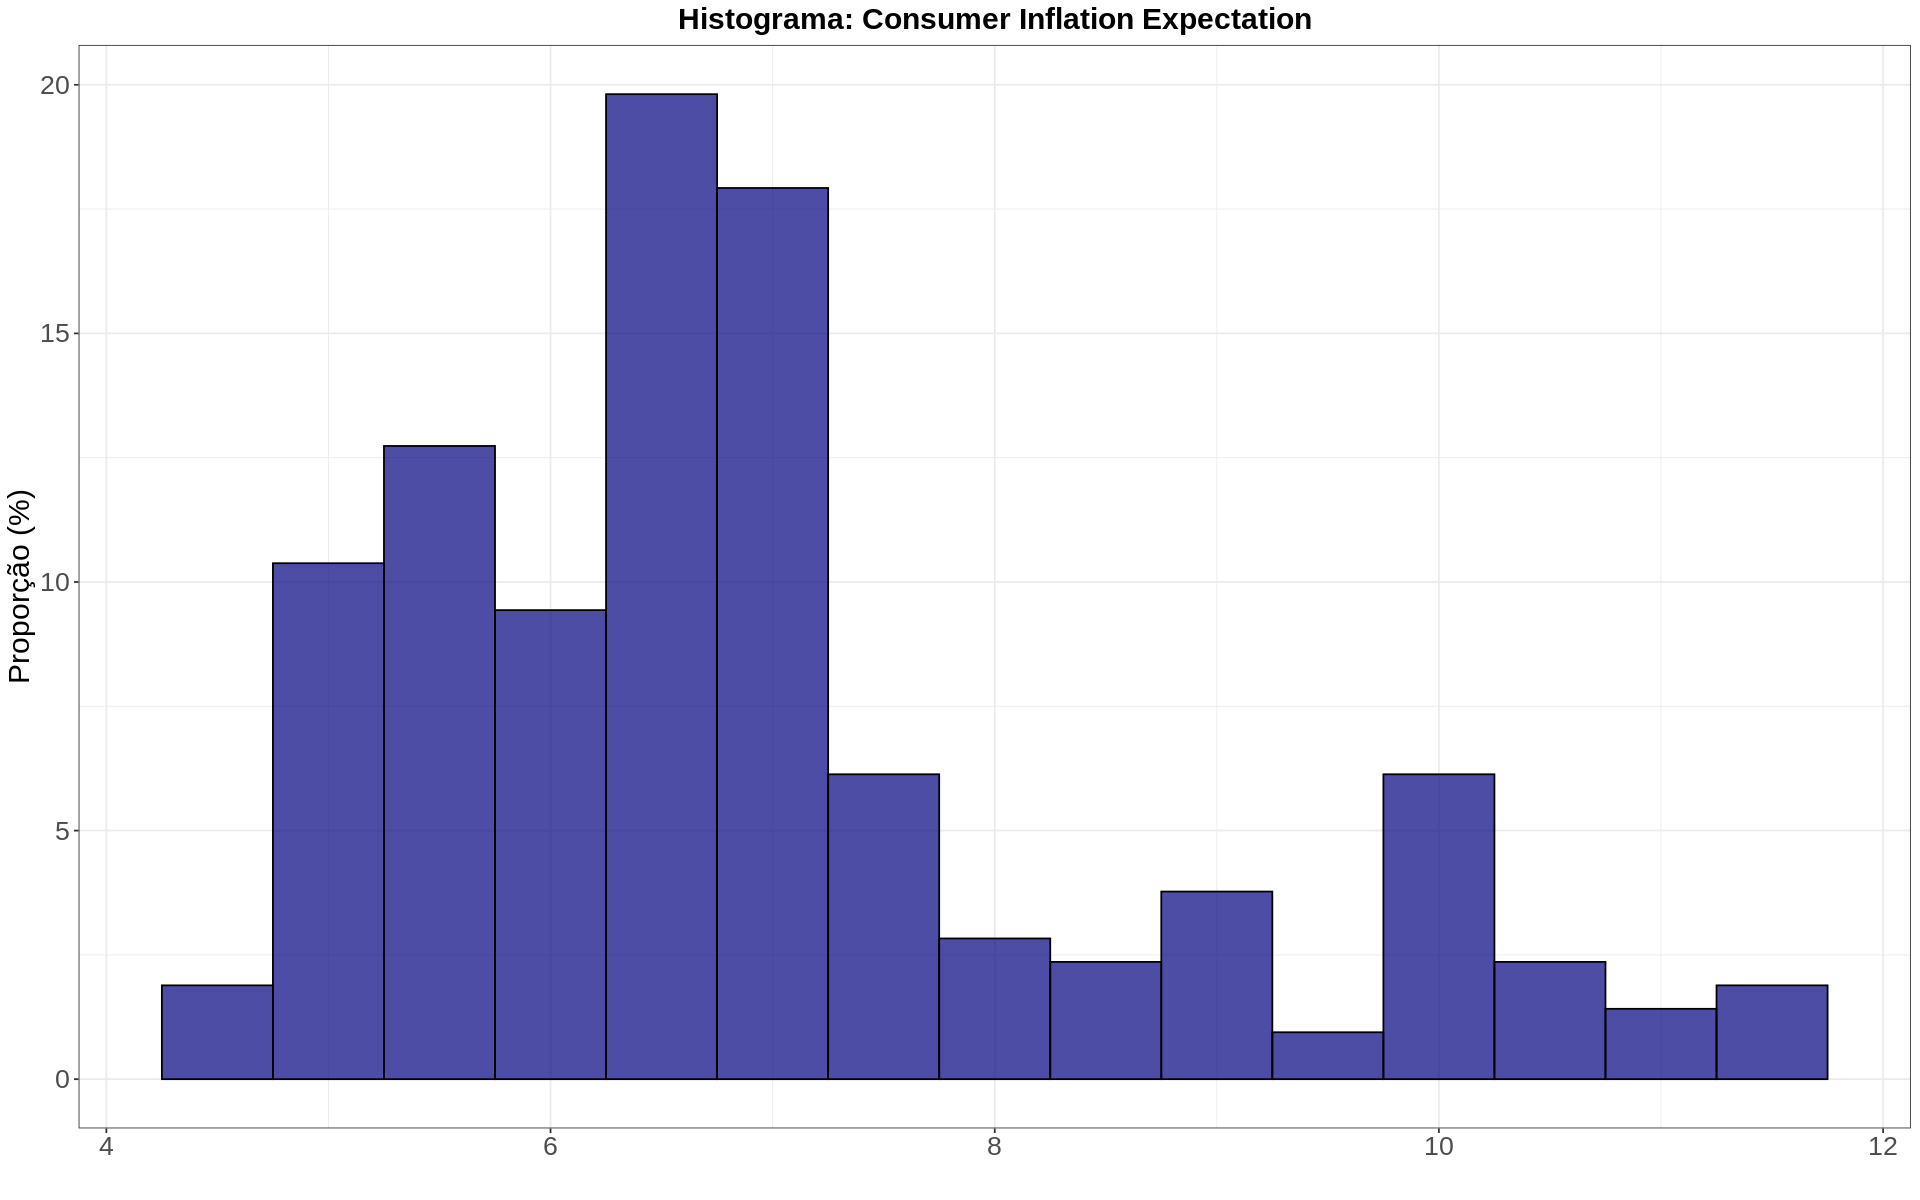

In [8]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o histograma dos valores da coluna "consumer_inflation_expectation"
ggplot(dados, aes(x = consumer_inflation_expectation, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.5, color = "black", fill = "navy", alpha = 0.7) +
  labs(x = "", y = "Proporção (%)", title = "Histograma: Consumer Inflation Expectation") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

#### **Comentário**

- Os consumidores, em média, estimam uma inflação 1,2p.p. acima do valor médio do IPCA (5,7%).
- Historicamente, cerca de 20% das estimativas de inflação foram ~6,5%, sendo que a maioria das respostas foram em torno desse valor, mas com uma leve concentração em especial em torno de 10%.

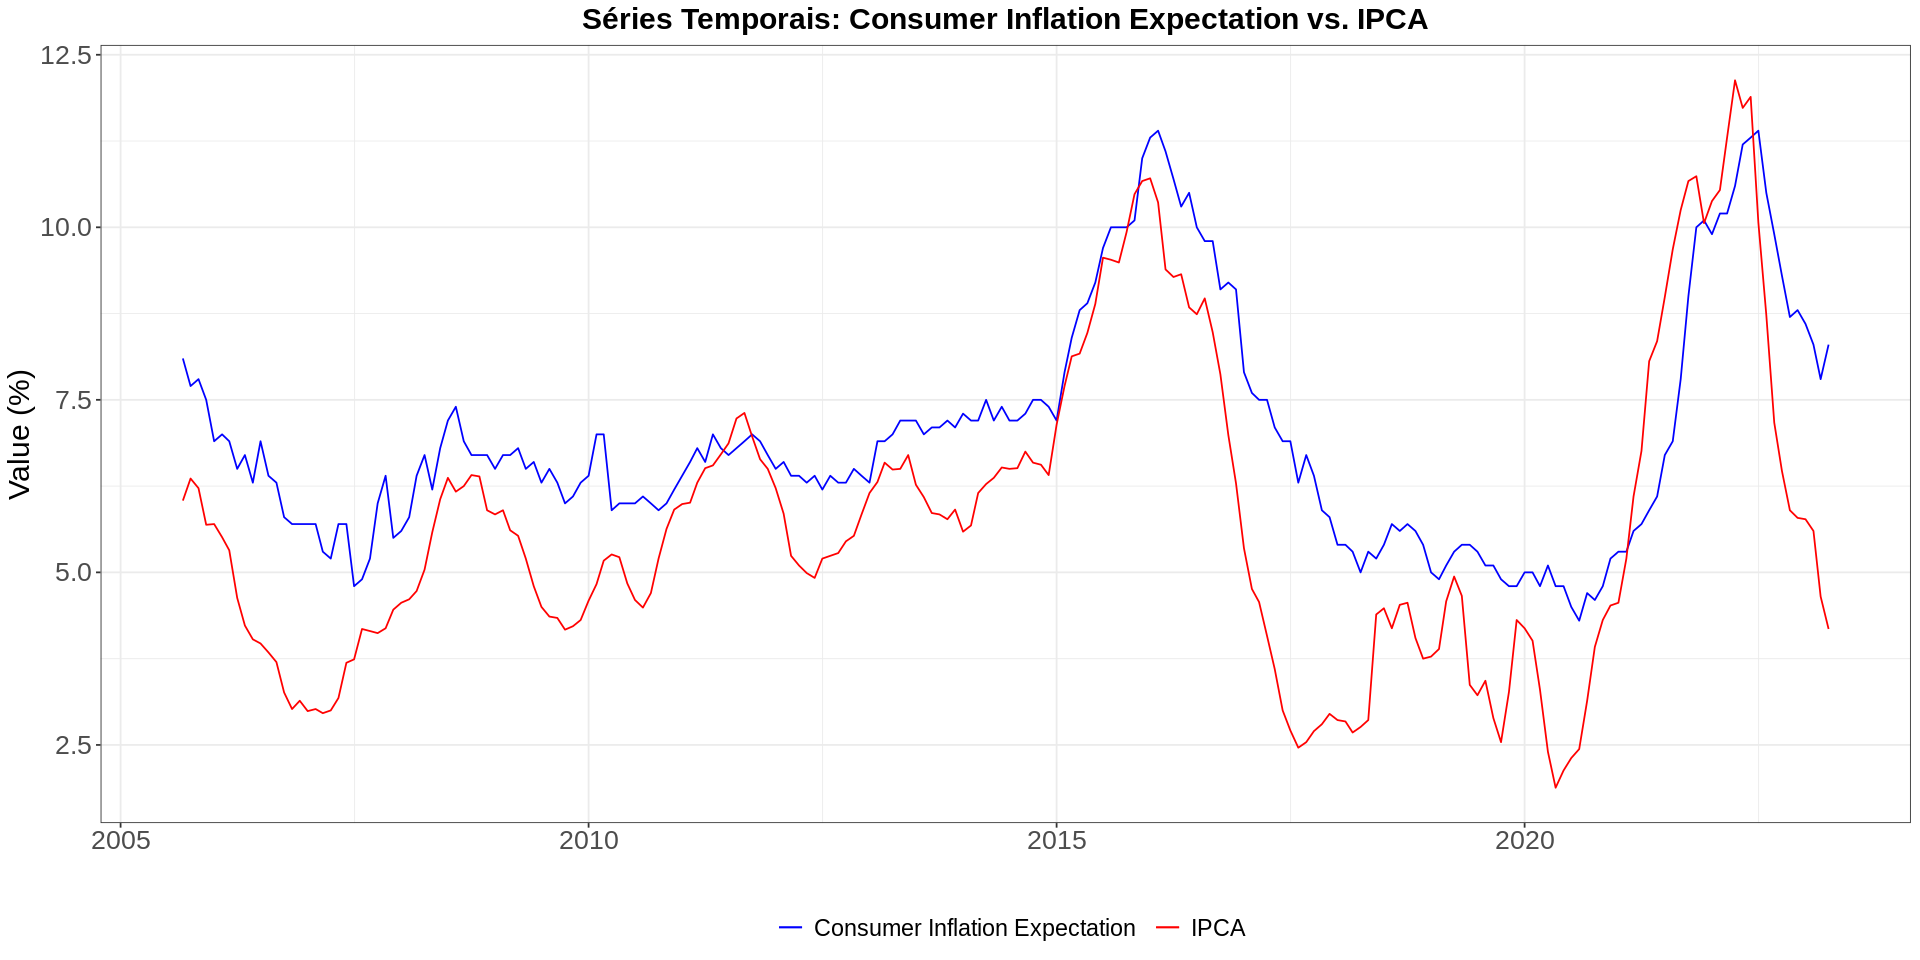

In [9]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 8)

# Plotar as séries temporais de "consumer_inflation_expectation" e "ipca"
ggplot(dados) +
  geom_line(aes(x = month, y = consumer_inflation_expectation, color = "Consumer Inflation Expectation")) +
  geom_line(aes(x = month, y = ipca, color = "IPCA")) +
  labs(x = "", y = "Value (%)", title = "Séries Temporais: Consumer Inflation Expectation vs. IPCA") +
  scale_color_manual(values = c("blue", "red"), name = "") +
  theme_bw() +
  theme(legend.position = "bottom",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

#### **Comentário**

- Dado a semelhança entre a série temporal do Índice de Expectativa de Inflação e do IPCA, entende-se que os consumidores ancoram de forma significativa a sua previsão da expectativa de inflação para 12 meses no valor vigente do IPCA.

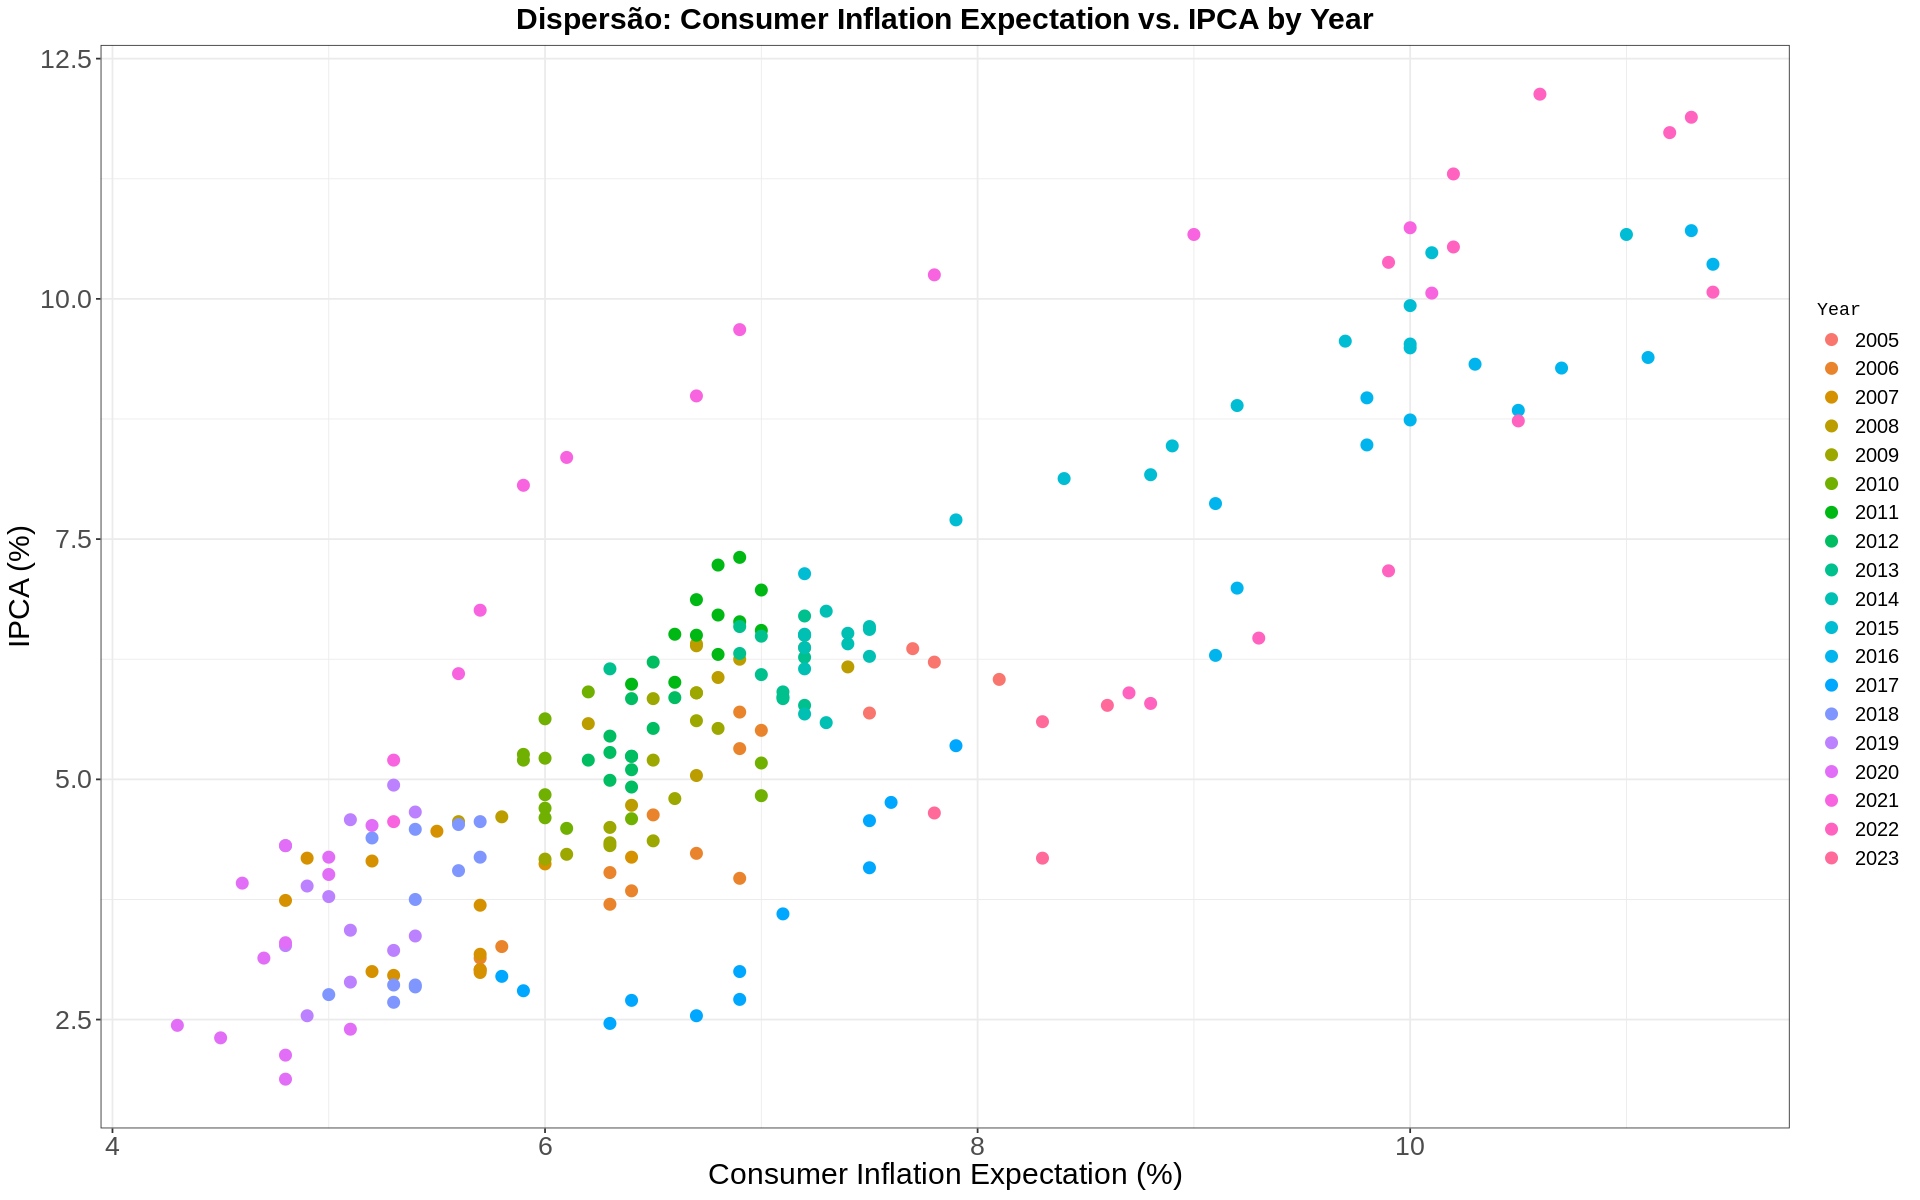

In [10]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "ipca"
ggplot(dados) +
  geom_point(aes(x = consumer_inflation_expectation, y = ipca, color = factor(year)), size = 3) +
  labs(x = "Consumer Inflation Expectation (%)", y = "IPCA (%)", title = "Dispersão: Consumer Inflation Expectation vs. IPCA by Year") +
  scale_color_discrete(name = "Year") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Year"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

#### **Comentário**

- De uma forma bem simplificada visualmente, a relação entre Expectativa de Inflação e IPCA parece ser diretamente proporcional, quanto maior o IPCA, maior a Expectativa de Inflação para 12 meses.

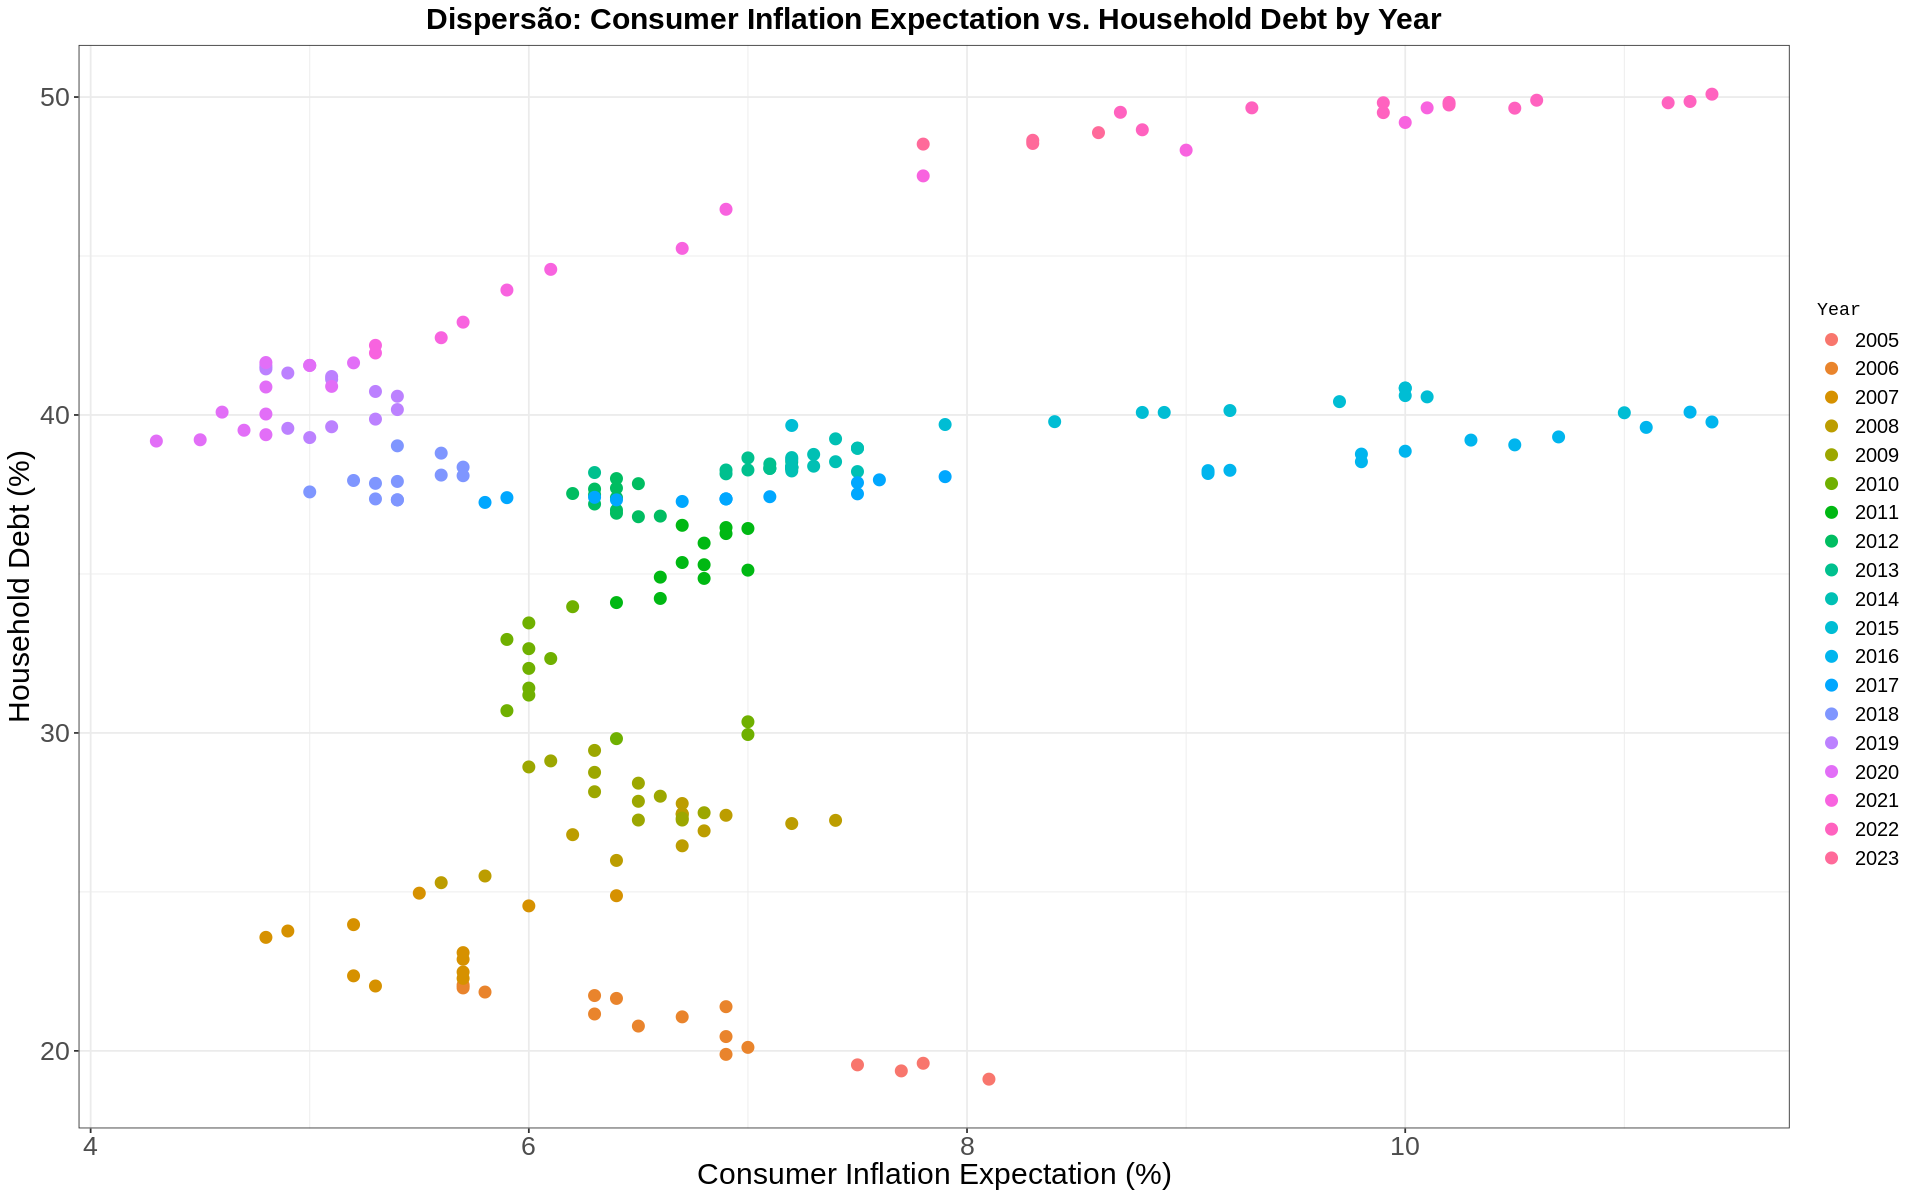

In [11]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "household_debt"
ggplot(dados) +
  geom_point(aes(x = consumer_inflation_expectation, y = household_debt, color = factor(year)), size = 3) +
  labs(x = "Consumer Inflation Expectation (%)", y = "Household Debt (%)", title = "Dispersão: Consumer Inflation Expectation vs. Household Debt by Year") +
  scale_color_discrete(name = "Year") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Year"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

#### **Comentário**

- De uma forma bem simplificada visualmente, a relação entre Expectativa de Inflação e Endividamento das Famílias parece ser diretamente proporcional, quanto maior o Endividamento, maior a Expectativa de Inflação para 12 meses; em especial, o ano em que a pesquisa foi realizada parece ter influenciado de forma significativa essa relação.

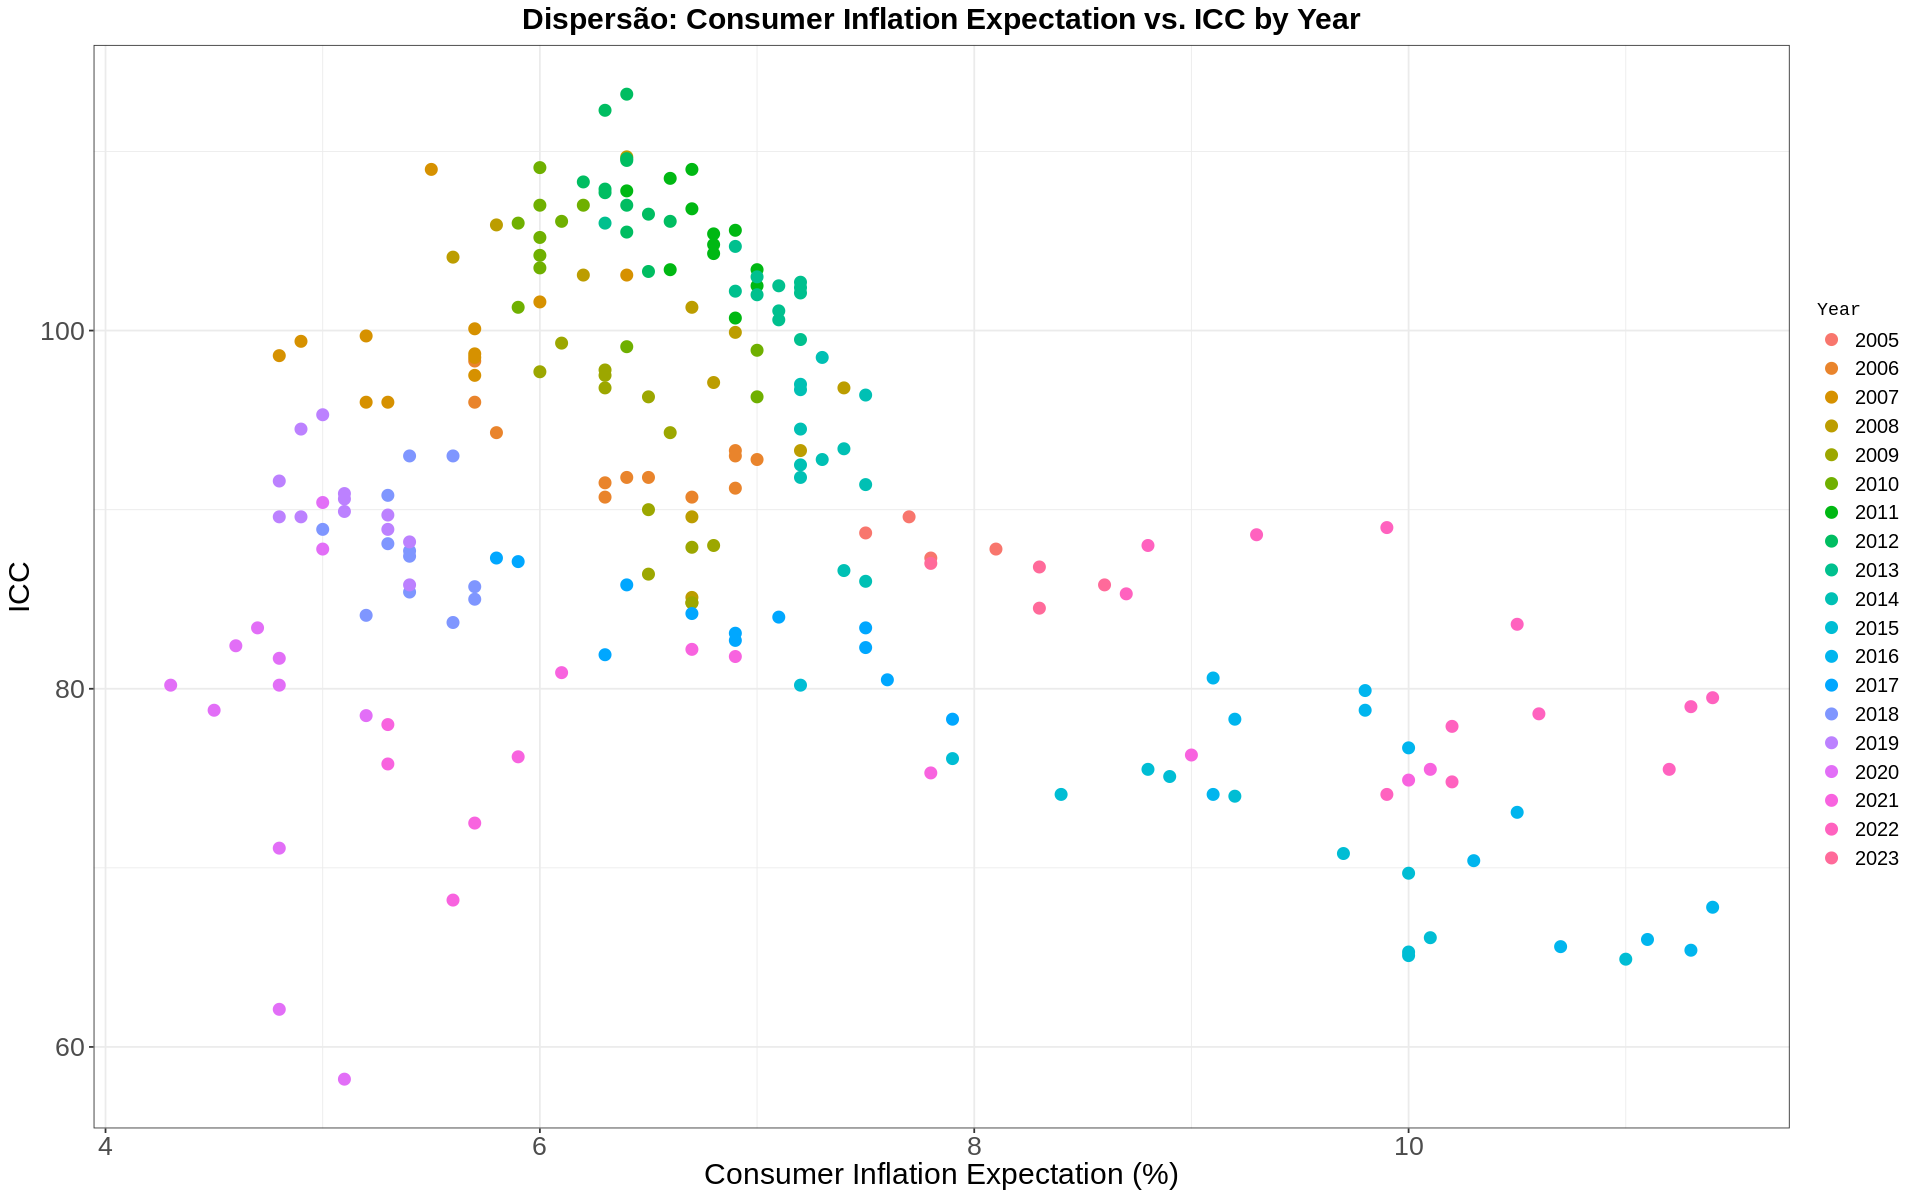

In [12]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o gráfico de dispersão de "consumer_inflation_expectation" e "usd_brl"
ggplot(dados) +
  geom_point(aes(x = consumer_inflation_expectation, y = icc, color = factor(year)), size = 3) +
  labs(x = "Consumer Inflation Expectation (%)", y = "ICC", title = "Dispersão: Consumer Inflation Expectation vs. ICC by Year") +
  scale_color_discrete(name = "Year") +
  theme_bw() +
  theme(legend.text = element_text(size = 12),
        legend.title = element_text("Year"),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

#### **Comentário**

- De uma forma bem simplificada visualmente, a relação entre Expectativa de Inflação e ICC parece ser inversamente proporcional, quanto maior o Índice de Confiança do Consumidor, menor a Expectativa de Inflação para 12 meses.

Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”
Warning message:
“Removed 1 rows containing missing values (`geom_rect()`).”


TableGrob (4 x 2) "arrange": 8 grobs
  z     cells    name           grob
1 1 (1-1,1-1) arrange gtable[layout]
2 2 (1-1,2-2) arrange gtable[layout]
3 3 (2-2,1-1) arrange gtable[layout]
4 4 (2-2,2-2) arrange gtable[layout]
5 5 (3-3,1-1) arrange gtable[layout]
6 6 (3-3,2-2) arrange gtable[layout]
7 7 (4-4,1-1) arrange gtable[layout]
8 8 (4-4,2-2) arrange gtable[layout]


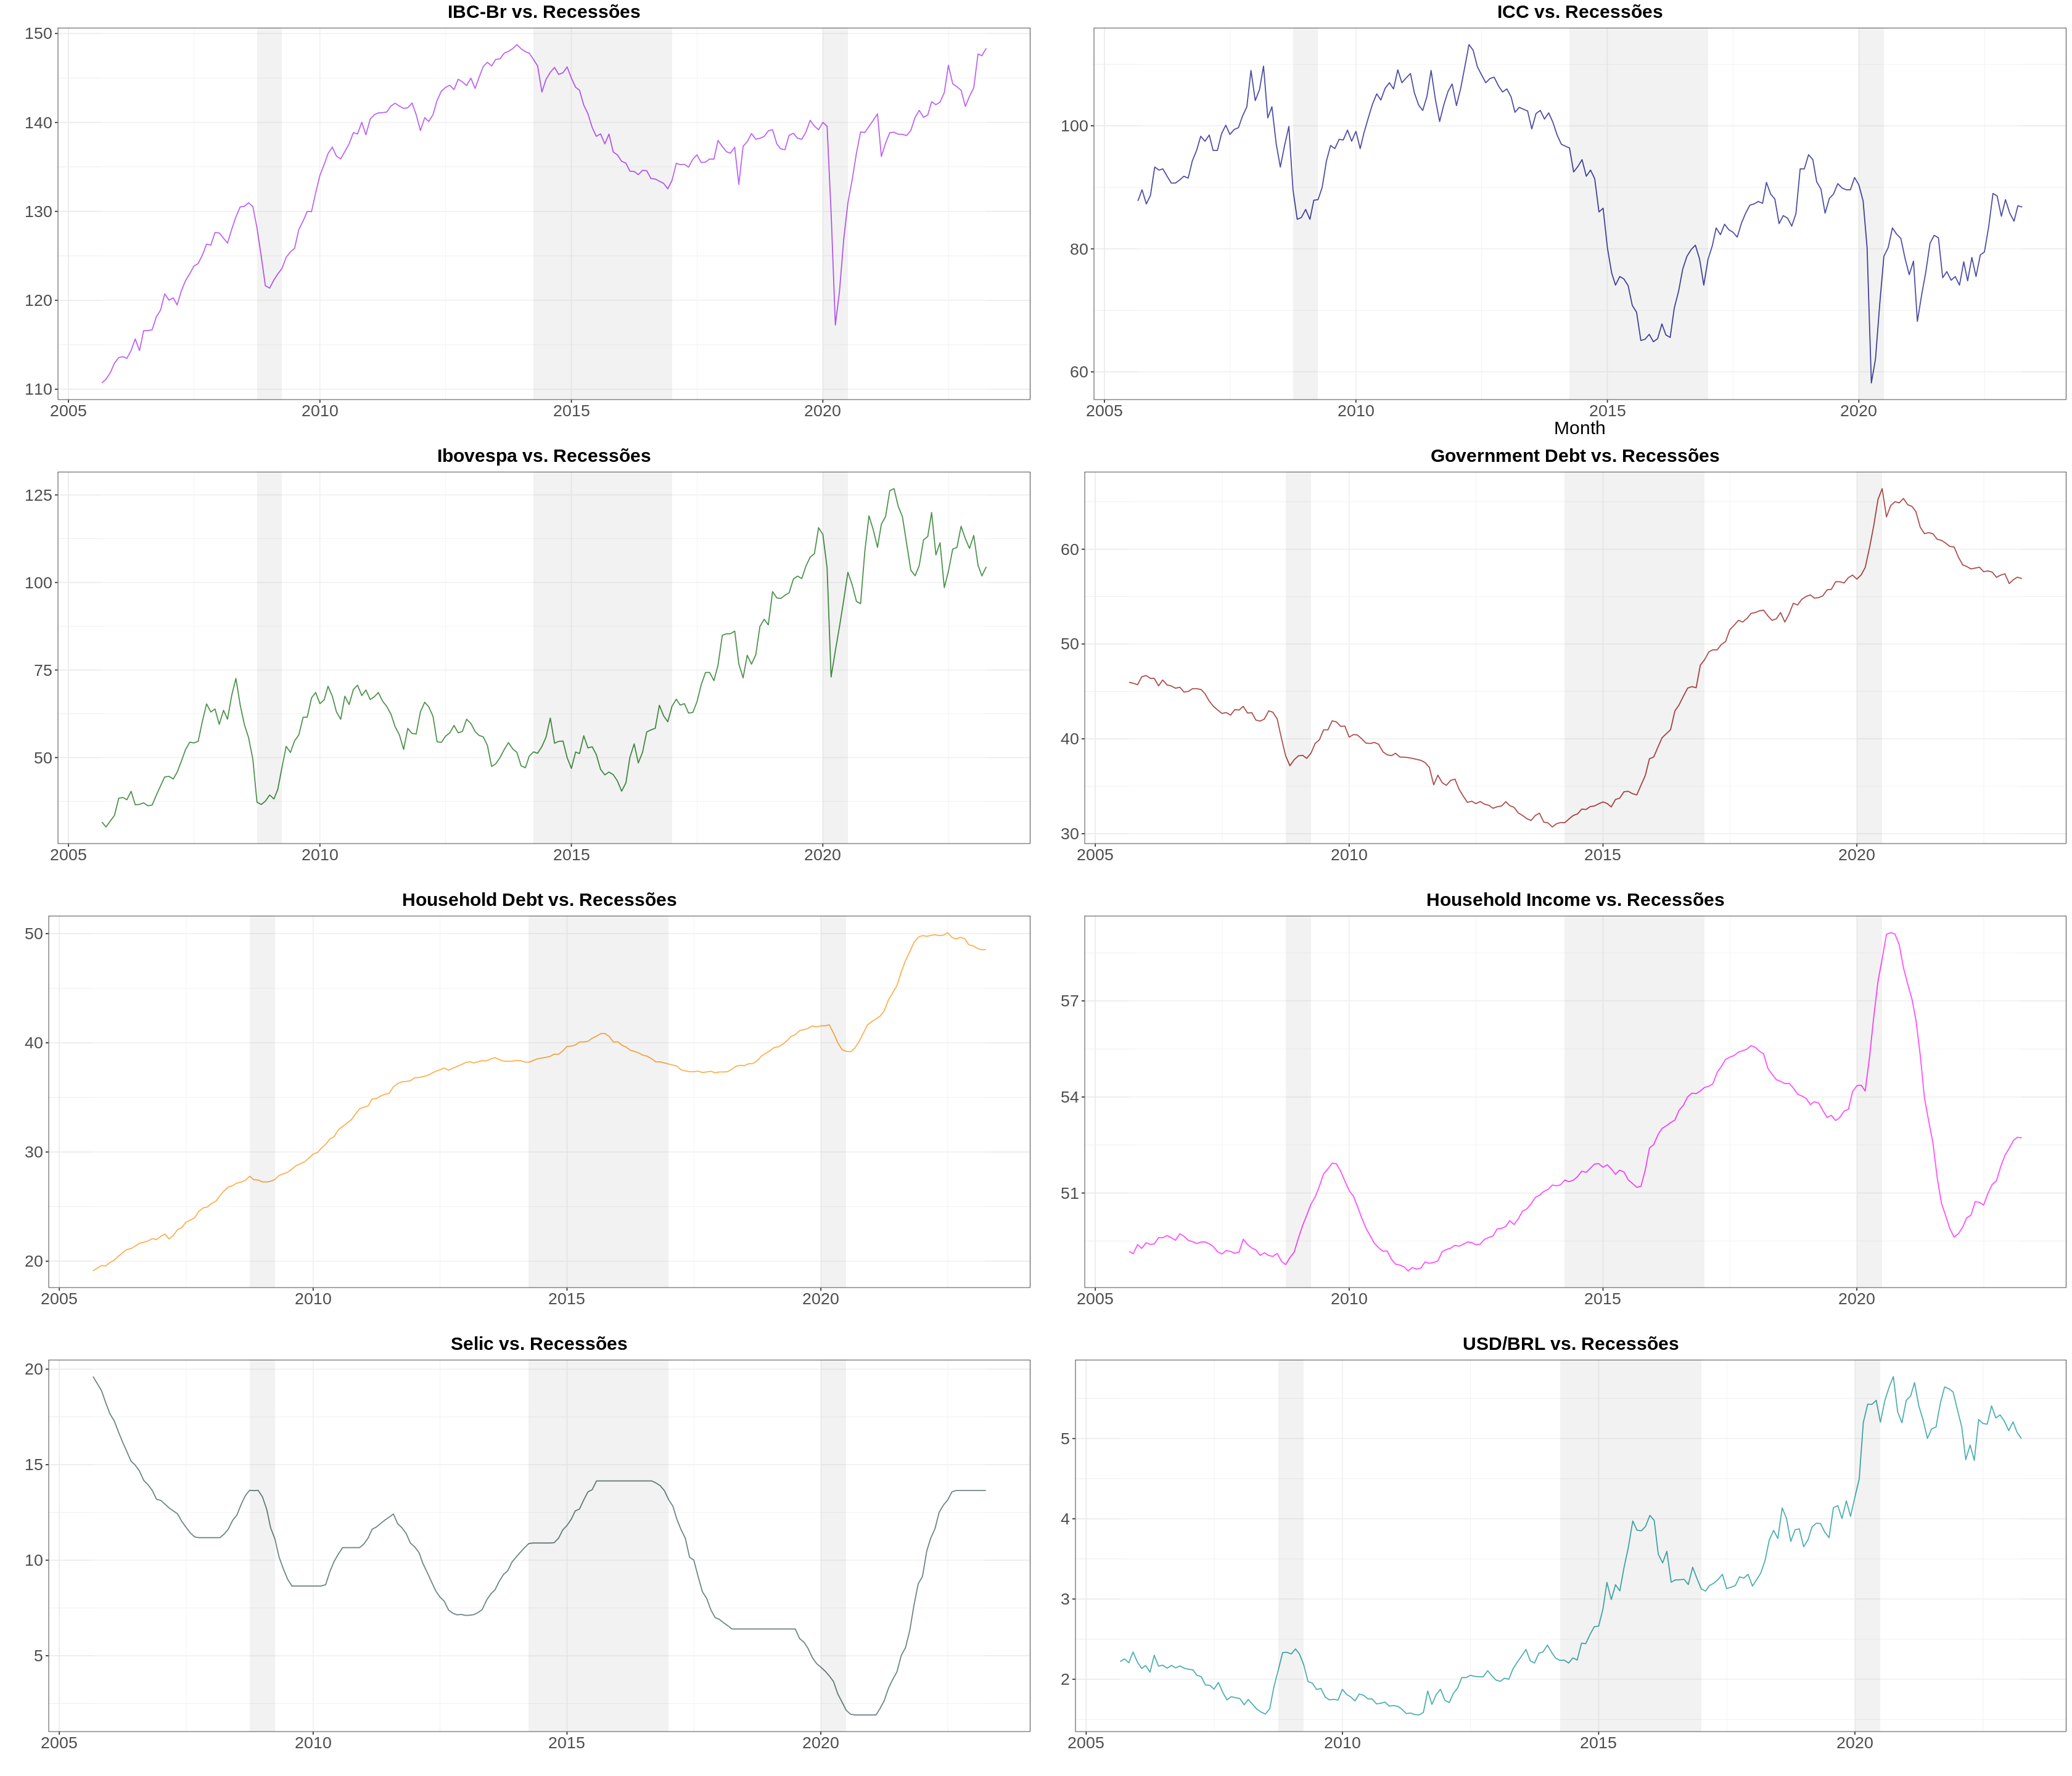

In [24]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 28, repr.plot.height = 24)

# Converter a coluna "codace_recession_factor" para fator
dados$codace_recession_factor <- as.factor(dados$codace_recession)

# Criar o objeto de plotagem para IBC-Br
p1 <- ggplot(dados) +
  geom_line(aes(x = month, y = ibc_br), color = "purple") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "IBC-Br vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))

# Criar o objeto de plotagem para ICC
p2 <- ggplot(dados) +
  geom_line(aes(x = month, y = icc), color = "navy") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "Month", y = "", title = "ICC vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))


# Criar o objeto de plotagem para Ibovespa
p3 <- ggplot(dados) +
  geom_line(aes(x = month, y = ibovespa), color = "darkgreen") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "Ibovespa vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))

# Criar o objeto de plotagem para Government Debt
p4 <- ggplot(dados) +
  geom_line(aes(x = month, y = gov_debt), color = "darkred") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "Government Debt vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))

# Criar o objeto de plotagem para Household Debt
p5 <- ggplot(dados) +
  geom_line(aes(x = month, y = household_debt), color = "darkorange") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "Household Debt vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))

# Criar o objeto de plotagem para Household Income
p6 <- ggplot(dados) +
  geom_line(aes(x = month, y = household_income), color = "magenta") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "Household Income vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))


# Criar o objeto de plotagem para Selic
p7 <- ggplot(dados) +
  geom_line(aes(x = month, y = selic), color = "darkslategray") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "Selic vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))

# Criar o objeto de plotagem para Dólar
p8 <- ggplot(dados) +
  geom_line(aes(x = month, y = usd_brl), color = "darkcyan") +
  geom_rect(aes(xmin = month, xmax = lead(month), ymin = -Inf, ymax = Inf, fill = codace_recession_factor), alpha = 0.3) +
  scale_fill_manual(values = c("transparent", "lightgray")) +
  labs(x = "", y = "", title = "USD/BRL vs. Recessões") +
  theme_bw() +
  theme(legend.position = "none",
        legend.text = element_text(size = 14),
        legend.title = element_blank(),
        plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14)) +
  scale_x_date(limits = c(min(dados$month), max(dados$month)))

# Combinar os gráficos em um único painel
painel <- grid.arrange(p1, p2, p3, p4, p5, p6, p7, p8, ncol = 2)

# Apresentar o painel
print(painel)

#### **Comentário**

- Os períodos de recessão datados pela CODACE podem ser relacionados com diferentes variáveis macroeconômicas, mas em especial, as métricas de IBC-Br e Government Debt, que são variáveis chave no indicativo de recessão do país.

### **Regressão linear múltipla**

> **Pergunta a ser respondida**

- Há associação entre variáveis macroeconômicas e o indicador de expectativa de inflação dos consumidores?

> **Equação do modelo econométrico proposto para responder a pergunta**

\begin{align*}
\text{consumer_inflation_expectation}_i &=
\beta_0 \cdot \text{icc}_{i-1} \\
&+ \beta_1 \cdot \text{codace_recession}_{i-1} \\
&+ \beta_2 \cdot \text{ipca}_{i-1} \\
&+ \beta_3 \cdot \text{selic}_{i-1} \\
&+ \beta_4 \cdot \text{ibc_br}_{i-1} \\
&+ \beta_5 \cdot \text{gov_debt}_{i-1} \\
&+ \beta_6 \cdot \text{household_debt}_{i-1} \\
&+ \beta_7 \cdot \text{household_income}_{i-1} \\
&+ \beta_8 \cdot \text{usd_brl}_{i-1} \\
&+ \beta_9 \cdot \text{ibovespa}_{i-1} \\
&+ ɛ_i
\end{align*}

- Entende-se que a informação da variável macroeconômica no mês anterior à realização da pesquisa tem efeito determinante na expectativa de inflação do consumidor entrevistado. Por isso, a variável dependente $\text{consumer_inflation_expectation}$ tem subscrito $i$ enquanto as variáveis independentes tem subscrito ${i-1}$.

> **Teste de hipótese para cada ${\beta_n}$, com $n = [0,9]$**

  - ${H}_0: \beta_n = 0$
  - ${H}_a: \beta_n \neq 0$

> **Nível de significância**

- **α** = 5%

> **Modelo econométrico**

In [14]:
linear_model =
  lm(consumer_inflation_expectation ~
    lag(icc, 1)
    + lag(codace_recession, 1)
    + lag(ipca, 1) + lag(selic, 1)
    + lag(ibc_br, 1)
    + lag(gov_debt, 1)
    + lag(household_debt, 1)
    + lag(household_income, 1)
    + lag(usd_brl, 1)
    + lag(ibovespa, 1),
    data = dados)

In [15]:
summary( linear_model )


Call:
lm(formula = consumer_inflation_expectation ~ lag(icc, 1) + lag(codace_recession, 
    1) + lag(ipca, 1) + lag(selic, 1) + lag(ibc_br, 1) + lag(gov_debt, 
    1) + lag(household_debt, 1) + lag(household_income, 1) + 
    lag(usd_brl, 1) + lag(ibovespa, 1), data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.05673 -0.25920  0.02894  0.24751  1.32029 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
(Intercept)               3.215735   2.062691   1.559  0.12058    
lag(icc, 1)              -0.023632   0.008039  -2.940  0.00367 ** 
lag(codace_recession, 1) -0.608433   0.123654  -4.920 1.80e-06 ***
lag(ipca, 1)              0.440185   0.027814  15.826  < 2e-16 ***
lag(selic, 1)             0.193319   0.014325  13.495  < 2e-16 ***
lag(ibc_br, 1)           -0.037703   0.014393  -2.620  0.00948 ** 
lag(gov_debt, 1)         -0.033056   0.016957  -1.949  0.05265 .  
lag(household_debt, 1)    0.112959   0.018825   6.000 9.09e-09 ***


#### **Comentário**

 - Uma vez que as variáveis $\text{Intercept}$, $\text{usd_brl}$ e $\text{ibovespa}$ não são estatisticamente significativas para o nível de significância escolhido de 5%, retiramos essas variáveis para elaborar um novo modelo.

In [16]:
linear_model_adjusted =
  lm(consumer_inflation_expectation ~
    -1
    + lag(icc, 1)
    + lag(codace_recession, 1)
    + lag(ipca, 1)
    + lag(selic, 1)
    + lag(ibc_br, 1)
    + lag(gov_debt, 1)
    + lag(household_debt, 1)
    + lag(household_income, 1),
    data = dados)

In [17]:
summary( linear_model_adjusted )


Call:
lm(formula = consumer_inflation_expectation ~ -1 + lag(icc, 1) + 
    lag(codace_recession, 1) + lag(ipca, 1) + lag(selic, 1) + 
    lag(ibc_br, 1) + lag(gov_debt, 1) + lag(household_debt, 1) + 
    lag(household_income, 1), data = dados)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.10478 -0.25690  0.01671  0.25467  1.30121 

Coefficients:
                          Estimate Std. Error t value Pr(>|t|)    
lag(icc, 1)              -0.015423   0.006160  -2.504  0.01308 *  
lag(codace_recession, 1) -0.582581   0.115780  -5.032 1.07e-06 ***
lag(ipca, 1)              0.464614   0.022684  20.482  < 2e-16 ***
lag(selic, 1)             0.210117   0.010843  19.377  < 2e-16 ***
lag(ibc_br, 1)           -0.035268   0.013159  -2.680  0.00796 ** 
lag(gov_debt, 1)         -0.042255   0.007453  -5.670 4.86e-08 ***
lag(household_debt, 1)    0.095982   0.015681   6.121 4.73e-09 ***
lag(household_income, 1)  0.133922   0.021987   6.091 5.54e-09 ***
---
Signif. codes:  0 ‘***’ 0.00

#### **Comentário**

- Agora que todas variáveis do modelo são estatisticamente significativas para o nível de significância escolhido de 5%, pode-se rejeitar a hipótese de nula de ${\beta_n}$ = 0 para todos ${\beta}$ associados as variáveis do modelo acima descrito.

- Apesar do valor de ${R^2 = 0.99}$ ser considerado algo bom, por significar que cerca de 99% da variabilidade na variável dependente (`consumer_inflation_expectation`) pode ser explicada pelas variáveis independentes incluídas no modelo, esse valor muito alto pode ser um indicativo de overfitting.

- Para garantir que não há overfitting, um próximo passo adequado seria realizar uma validação cruzada e/ou reduzir o número de variáveis utilizando técnicas de regularização como a regressão Ridge e Lasso.

> **Resíduos**

In [18]:
residuos = residuals(linear_model_adjusted)

In [19]:
stargazer(data.frame(residuos), digits = 2, type = "text")


Statistic  N  Mean  St. Dev.  Min  Max 
---------------------------------------
residuos  211 0.001   0.42   -1.10 1.30
---------------------------------------


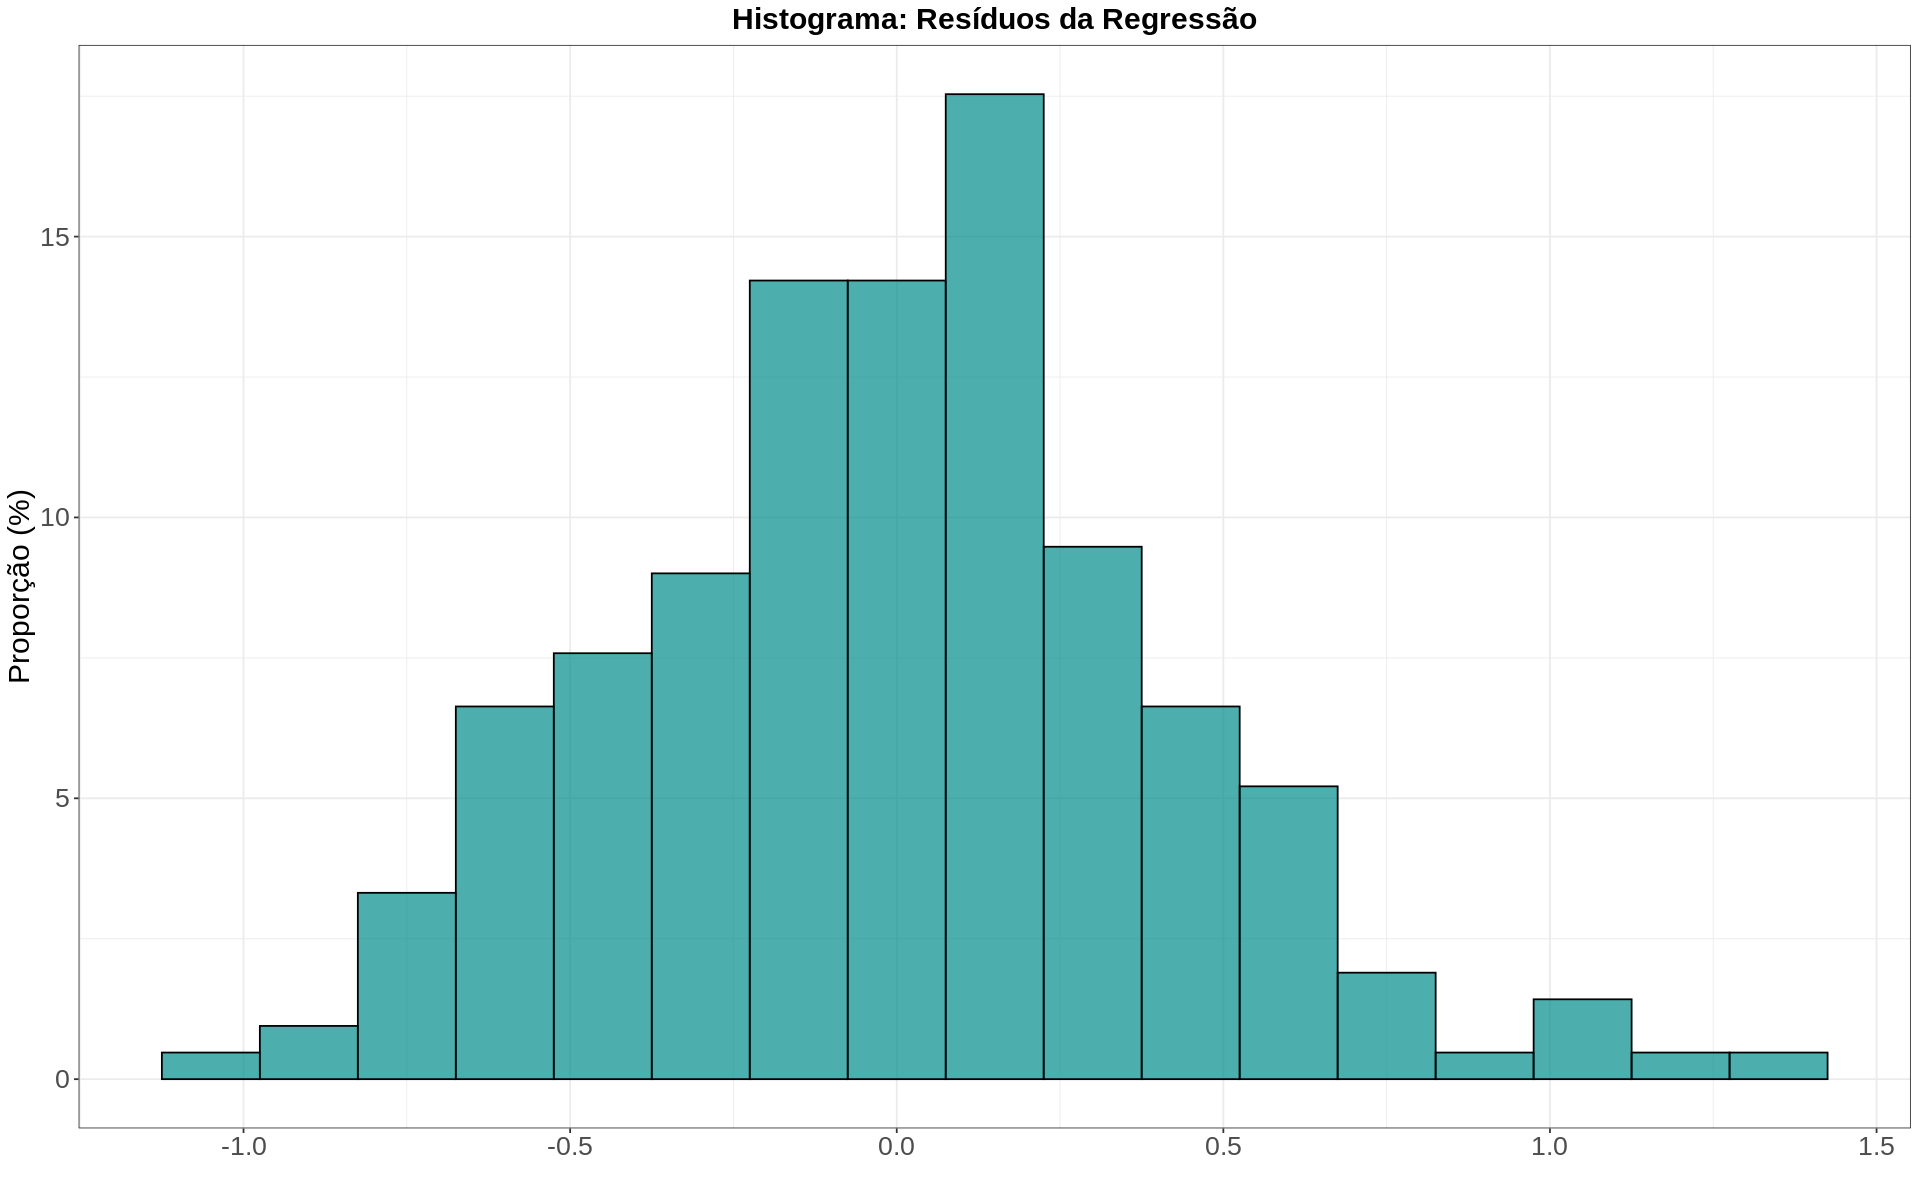

In [25]:
# Definir o tamanho da imagem de saída
options(repr.plot.width = 16, repr.plot.height = 10)

# Plotar o histograma dos resíduos da regressão com valores relativos em %
ggplot(data.frame(residuos), aes(x = residuos, y = 100 * after_stat(count) / sum(after_stat(count)))) +
  geom_histogram(binwidth = 0.15, color = "black", fill = "darkcyan", alpha = 0.7) +
  labs(title = "Histograma: Resíduos da Regressão", x = "", y = "Proporção (%)") +
  theme_bw() +
  theme(plot.title = element_text(size = 18, face = "bold", hjust = 0.5),
        axis.text = element_text(size = 16),
        axis.title = element_text(size = 18),
        plot.caption = element_text(size = 14))

#### **Comentário**

- A média dos resíduos ser zero é uma propriedade desejável em um modelo de regressão, pois indica que o modelo está capturando corretamente a relação média entre as variáveis independentes e dependentes.
- No entanto, não é suficiente para garantir a estacionariedade dos resíduos, sendo ainda necessário realizar o teste de raiz unitária.

> **Estimativa**

In [21]:
# Extrair os coeficientes do modelo linear
coeficientes <- coef(linear_model_adjusted)

# Extrair os valores mais recentes das variáveis do modelo
ultimo_icc <- tail(dados$icc, 1)
ultimo_codace_recession <- tail(dados$codace_recession, 1)
ultimo_ipca <- tail(dados$ipca, 1)
ultimo_selic <- tail(dados$selic, 1)
ultimo_ibc_br <- tail(dados$ibc_br, 1)
ultimo_gov_debt <- tail(dados$gov_debt, 1)
ultimo_household_debt <- tail(dados$household_debt, 1)
ultimo_household_income <- tail(dados$household_income, 1)

# Calcular a estimativa
estimativa <-
  coeficientes[1] * ultimo_icc +
  coeficientes[2] * ultimo_codace_recession +
  coeficientes[3] * ultimo_ipca +
  coeficientes[4] * ultimo_selic +
  coeficientes[5] * ultimo_ibc_br +
  coeficientes[6] * ultimo_gov_debt +
  coeficientes[7] * ultimo_household_debt +
  coeficientes[8] * ultimo_household_income

# Valor atual para Mai-2023 segundo FGV IBRE
valor_real <- 8.2

# Imprimir a estimativa
print(paste("Estimativa para Maio-2023:", round(estimativa,2)))

# Imprimir o valor real
print(paste("Valor real para Maio-2023:", valor_real))

# Diferença entre real e estimativa
print(paste("Diferença na previsão: Valor absoluto =", round(valor_real-estimativa,2)))
print(paste("Diferença na previsão: Valor relativo =", round(100*(valor_real/estimativa-1),2), "%"))

[1] "Estimativa para Maio-2023: 7.56"
[1] "Valor real para Maio-2023: 8.2"
[1] "Diferença na previsão: Valor absoluto = 0.64"
[1] "Diferença na previsão: Valor relativo = 8.53 %"


#### **Comentário**

- A estimativa do Índice de Expectativa de Inflação dos Consumidores para o mês de Maio/2023 apresentou um resíduo maior que o desvio padrão de 0.42 apresentado pela análise de resíduos do modelo de regressão linear múltipla.
- Porém, a estimativa ainda está dentro de um patamar de ±10% do valor realizado.

### **Teste de Raiz Unitária**

> **ADF (Augmented Dickey-Fuller)**

- Nível de Significância
  * α = 5%

- Testes de Hipótese
  * **tau3**
    * Hipótese nula: possui raiz unitária
  * **phi2**
    * Hipótese nula: possui raiz unitária, sem tendência e sem drift
  * **phi3**
    * Hipótese nula: possui raiz unitária e sem tendência

In [22]:
summary( ur.df( residuos, lags=12, type='trend') )


############################################### 
# Augmented Dickey-Fuller Test Unit Root Test # 
############################################### 

Test regression trend 


Call:
lm(formula = z.diff ~ z.lag.1 + 1 + tt + z.diff.lag)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.81362 -0.18141 -0.00421  0.15169  0.89724 

Coefficients:
               Estimate Std. Error t value Pr(>|t|)    
(Intercept)   0.0408322  0.0468542   0.871  0.38464    
z.lag.1      -0.4276820  0.0966663  -4.424 1.66e-05 ***
tt           -0.0002994  0.0003742  -0.800  0.42473    
z.diff.lag1   0.1235761  0.1012813   1.220  0.22399    
z.diff.lag2   0.0589670  0.0992859   0.594  0.55330    
z.diff.lag3   0.1317104  0.0975729   1.350  0.17873    
z.diff.lag4   0.1438188  0.0931931   1.543  0.12450    
z.diff.lag5   0.2494389  0.0905444   2.755  0.00646 ** 
z.diff.lag6   0.0991090  0.0884157   1.121  0.26378    
z.diff.lag7   0.1070107  0.0855039   1.252  0.21234    
z.diff.lag8   0.0902953  0.08484

#### **Comentário**

- Como os valores de test-statistic são maiores, em módulo, que tau3, phi2 e phi3 para um nível de significância de 5%, rejeita-se as hipóteses nulas, ou seja, os resíduos não possuem raiz unitária, o que implica que os resíduos são estacionários.

> **KPSS (Kwiatkowski-Phillips-Schmidt-Shin)**

- Nível de Significância
  * α = 5%

- Teste de Hipótese
  * $H_0$: não possui raiz unitária

In [23]:
summary( ur.kpss( residuos, type = "tau", lags = "short") )


####################### 
# KPSS Unit Root Test # 
####################### 

Test is of type: tau with 4 lags. 

Value of test-statistic is: 0.0601 

Critical value for a significance level of: 
                10pct  5pct 2.5pct  1pct
critical values 0.119 0.146  0.176 0.216


#### **Comentário**

- Como o valore de test-statistic é menor, em módulo, que o valor crítico para um nível de significância de 5%, não rejeita a hipótese nula, ou seja, os resíduos não possuem raiz unitária, o que implica que os resíduos são estacionários.